In [2]:
library(quantmod)
library(tseries)
library(fGarch)
library(mgcv)
library(TSA)
library(rugarch)



Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Warning message:
"package 'tseries' was built under R version 3.6.3"Warning message:
"package 'fGarch' was built under R version 3.6.3"Loading required package: timeDate
Loading required package: timeSeries

Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-

Loading required package: fBasics

Attaching package: 'fBasics'

The following object is masked from 'package:TTR':

    volatility

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.

Attaching package: 'TSA'

The

In [18]:
data <- read.csv("TSLA.csv", header=TRUE)
data <- log(data[,2])
data.ts <- ts(data,start=c(2012,1),freq=52)
data.growth = diff(data.ts)

In [19]:
## Order selection -- AIC

test_modelA <- function(p,d,q){
 mod = arima(data.growth, order=c(p,d,q), method="ML")
 current.aic = AIC(mod)
 df = data.frame(p,d,q,current.aic)
 names(df) <- c("p","d","q","AIC")
 print(paste(p,d,q,current.aic,sep=" "))
    
 return(df)
 }
 
 orders = data.frame(Inf,Inf,Inf,Inf)
 names(orders) <- c("p","d","q","AIC")
 
 
 for (p in 0:6){
   for (d in 0:1){
     for (q in 0:3) {
       possibleError <- tryCatch(
         orders<-rbind(orders,test_modelA(p,d,q)),
         error=function(e) e
       )
       if(inherits(possibleError, "error")) next
 
     }
   }
 }
 orders <- orders[order(-orders$AIC),]
 tail(orders)


[1] "0 0 0 -1001.95153390885"
[1] "0 0 1 -999.976533799224"
[1] "0 0 2 -998.781091149895"
[1] "0 0 3 -997.215363657174"
[1] "0 1 0 -743.007531101551"
[1] "0 1 1 -993.848790218804"
[1] "0 1 2 -991.848861232875"
[1] "0 1 3 -990.468044137523"
[1] "1 0 0 -999.978980972446"
[1] "1 0 1 -999.143218049959"
[1] "1 0 2 -997.816357933342"
[1] "1 0 3 -995.877880742838"
[1] "1 1 0 -859.69941165643"
[1] "1 1 1 -991.848866912499"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "1 1 2 -990.743965036962"
[1] "1 1 3 -989.130917058461"
[1] "2 0 0 -998.913427351276"
[1] "2 0 1 -997.790707395601"
[1] "2 0 2 -996.385041231998"
[1] "2 0 3 -994.40479903398"
[1] "2 1 0 -901.028953437384"
[1] "2 1 1 -990.553350539889"
[1] "2 1 2 -989.130422014283"
[1] "2 1 3 -987.744041095685"
[1] "3 0 0 -997.256885851907"
[1] "3 0 1 -995.841274462017"
[1] "3 0 2 -994.392863360153"


Warning message in log(s2):
"NaNs produced"

[1] "3 0 3 -992.855113485499"
[1] "3 1 0 -930.317317023143"
[1] "3 1 1 -988.795182282954"
[1] "3 1 2 -987.135492150675"
[1] "3 1 3 -985.869986436799"
[1] "4 0 0 -997.275179594166"
[1] "4 0 1 -996.907630304939"
[1] "4 0 2 -1003.80278178073"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "4 0 3 -1001.78864423781"
[1] "4 1 0 -932.817470576436"
[1] "4 1 1 -988.643859271108"
[1] "4 1 2 -988.300379812244"
[1] "4 1 3 -995.302905244194"
[1] "5 0 0 -996.836810349881"
[1] "5 0 1 -995.465877556968"
[1] "5 0 2 -1000.79774517522"
[1] "5 0 3 -1000.04876830646"
[1] "5 1 0 -947.049310931769"
[1] "5 1 1 -988.356088981546"
[1] "5 1 2 -986.95509277809"
[1] "5 1 3 -992.215832761177"
[1] "6 0 0 -996.124079147594"
[1] "6 0 1 -994.123760814428"
[1] "6 0 2 -1000.93620701926"
[1] "6 0 3 -998.136481406853"
[1] "6 1 0 -950.912546457137"
[1] "6 1 1 -987.508986888552"
[1] "6 1 2 -985.509015486737"
[1] "6 1 3 -990.476936750176"


,p,d,q,AIC
,<dbl>,<dbl>,<dbl>,<dbl>
45,5,0,3,-1000.049
44,5,0,2,-1000.798
52,6,0,2,-1000.936
37,4,0,3,-1001.789
2,0,0,0,-1001.952
36,4,0,2,-1003.803


In [20]:
mod.arima=arima(data.growth ,order=c(4,0,2))
mod.arima


Call:
arima(x = data.growth, order = c(4, 0, 2))

Coefficients:
          ar1      ar2     ar3     ar4     ma1     ma2  intercept
      -1.2937  -0.8501  0.1048  0.1193  1.3206  0.9363     0.0057
s.e.   0.0652   0.1153  0.0848  0.0568  0.0430  0.0840     0.0036

sigma^2 estimated as 0.004049:  log likelihood = 509.9,  aic = -1005.8

In [21]:
resid.ar=residuals(mod.arima)

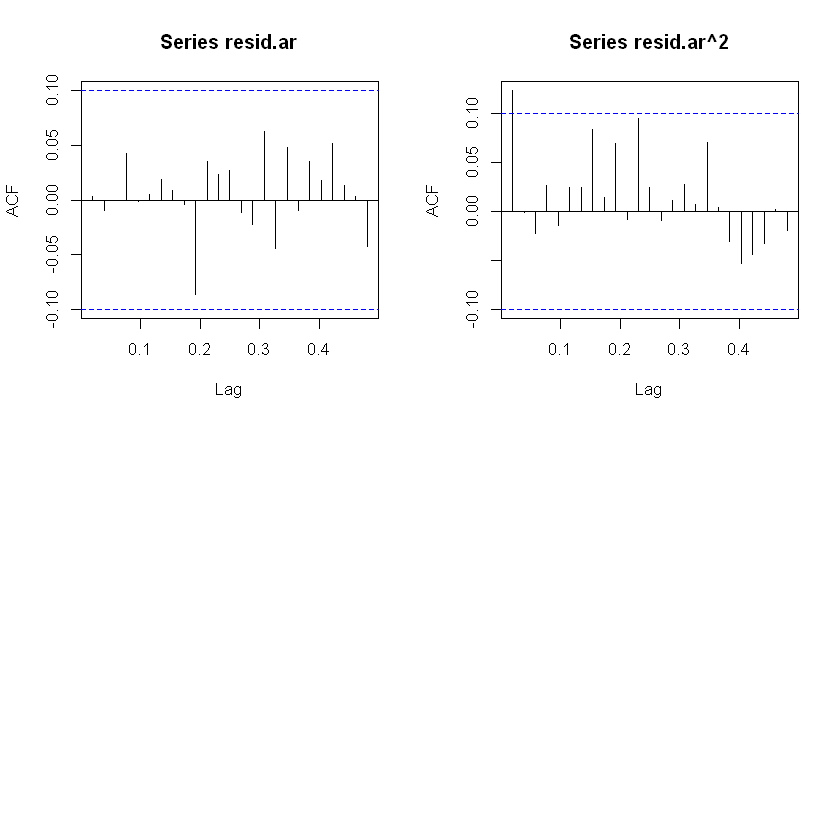

In [22]:
par(mfrow=c(2,2))
acf(resid.ar)
acf(resid.ar^2)

In [23]:
#test for serial correlation
Box.test(resid.ar,lag=7,type='Ljung',fitdf=6)
#test for arch effect
Box.test((resid.ar)^2,lag=7,type='Ljung',fitdf=6)


	Box-Ljung test

data:  resid.ar
X-squared = 0.89344, df = 1, p-value = 0.3445



	Box-Ljung test

data:  (resid.ar)^2
X-squared = 6.9288, df = 1, p-value = 0.008482


In [25]:
#Initial GARCH Order
#ARIMA-GARCH GARCH order
test_modelAGG <- function(m,n){
  spec = ugarchspec(variance.model=list(garchOrder=c(m,n)),
                    mean.model=list(armaOrder=c(4,2), 
                                    include.mean=T), distribution.model="std")    
  fit = ugarchfit(spec, data.growth, solver = 'hybrid')
  current.bic = infocriteria(fit)[2]
  df = data.frame(m,n,current.bic)
  names(df) <- c("m","n","BIC")
  print(paste(m,n,current.bic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf)
names(orders) <- c("m","n","BIC")


for (m in 0:5){
  for (n in 0:5){
    possibleError <- tryCatch(
      orders<-rbind(orders,test_modelAGG(m,n)),
      error=function(e) e
    )
    if(inherits(possibleError, "error")) next
  }
}
orders <- orders[order(-orders$BIC),]
tail(orders)



[1] "0 0 -2.56390336439894"
[1] "0 1 -2.54827545768711"
[1] "0 2 -2.5264022896131"
[1] "0 3 -2.5228105283645"
[1] "0 4 -2.50158025194299"
[1] "0 5 -2.48600992412097"
[1] "1 0 -2.5561398224055"
[1] "1 1 -2.5494677753056"
[1] "1 2 -2.58578001743585"
[1] "1 3 -2.59058774556592"
[1] "1 4 -2.57612530359049"
[1] "1 5 -2.5570345134598"
[1] "2 0 -2.51837530822622"
[1] "2 1 -2.53390384618129"
[1] "2 2 -2.51887509772773"
[1] "2 3 -2.5708877717429"
[1] "2 4 -2.5525036830206"
[1] "2 5 -2.53454252594754"
[1] "3 0 -2.48055787113387"
[1] "3 1 -2.57823919375464"
[1] "3 2 -2.55774714378671"
[1] "3 3 -2.56315054039874"
[1] "3 4 -2.55008936501963"
[1] "3 5 -2.52069746837176"
[1] "4 0 -2.49095476469696"
[1] "4 1 -2.56696331334057"
[1] "4 2 -2.55240668811245"
[1] "4 3 -2.54470070724568"
[1] "4 4 -2.52777611062242"
[1] "4 5 -2.51537009695737"
[1] "5 0 -2.41174905573023"
[1] "5 1 -2.55278459302489"
[1] "5 2 -2.53947124858028"
[1] "5 3 -2.52425012612809"
[1] "5 4 -2.50813253119682"
[1] "5 5 -2.50257697838879"

,m,n,BIC
,<dbl>,<dbl>,<dbl>
27,4,1,-2.566963
17,2,3,-2.570888
12,1,4,-2.576125
21,3,1,-2.578239
10,1,2,-2.585780
11,1,3,-2.590588


In [26]:
#ARMA update
#ARIMA-GARCH ARIMA order
test_modelAGA <- function(p,q){
  spec = ugarchspec(variance.model=list(garchOrder=c(1,3)),
                    mean.model=list(armaOrder=c(p,q), 
                                    include.mean=T), distribution.model="std")    
  fit = ugarchfit(spec, data.growth, solver = 'hybrid')
  current.bic = infocriteria(fit)[2]
  df = data.frame(p,q,current.bic)
  names(df) <- c("p","q","BIC")
  print(paste(p,q,current.bic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf)
names(orders) <- c("p","q","BIC")


for (p in 0:5){
  for (q in 0:5){
    possibleError <- tryCatch(
      orders<-rbind(orders,test_modelAGA(p,q)),
      error=function(e) e
    )
    if(inherits(possibleError, "error")) next
  }
}
orders <- orders[order(-orders$BIC),]
tail(orders)



[1] "0 0 -2.58397060144452"
[1] "0 1 -2.56909703095898"
[1] "0 2 -2.55453618379975"
[1] "0 3 -2.53914769765186"
[1] "0 4 -2.53058023111973"
[1] "0 5 -2.52444289516905"
[1] "1 0 -2.56915173349668"
[1] "1 1 -2.55726242939555"
[1] "1 2 -2.54198813259193"
[1] "1 3 -2.52689759765734"
[1] "1 4 -2.52426342690877"
[1] "1 5 -2.51174374558501"
[1] "2 0 -2.55410280979333"
[1] "2 1 -2.53887935635328"
[1] "2 2 -2.54925085531323"
[1] "2 3 -2.57327740169067"
[1] "2 4 -2.51839919015408"
[1] "2 5 -2.50629375155924"
[1] "3 0 -2.53975699283718"
[1] "3 1 -2.52534822314837"
[1] "3 2 -2.51161270989103"
[1] "3 3 -2.50947148176195"
[1] "3 4 -2.50398310931263"
[1] "3 5 -2.48741146470322"
[1] "4 0 -2.53118923207362"
[1] "4 1 -2.52039448095585"
[1] "4 2 -2.58946016466767"
[1] "4 3 -2.57697112999446"
[1] "4 4 -2.56298627385458"
[1] "4 5 -2.48093167177124"
[1] "5 0 -2.52187358144667"
[1] "5 1 -2.5063474943116"
[1] "5 2 -2.50705529583632"
[1] "5 3 -2.52628293442688"
[1] "5 4 -2.53396802711226"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "5 5 -2.51806870892996"


,p,q,BIC
,<dbl>,<dbl>,<dbl>
3,0,1,-2.569097
8,1,0,-2.569152
17,2,3,-2.573277
29,4,3,-2.576971
2,0,0,-2.583971
28,4,2,-2.589460


In [27]:
#GARCH update
test_modelAGG <- function(m,n){
  spec = ugarchspec(variance.model=list(garchOrder=c(m,n)),
                    mean.model=list(armaOrder=c(4,2), 
                                    include.mean=T), distribution.model="std")    
  fit = ugarchfit(spec, data.growth, solver = 'hybrid')
  current.bic = infocriteria(fit)[2]
  df = data.frame(m,n,current.bic)
  names(df) <- c("m","n","BIC")
  print(paste(m,n,current.bic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf)
names(orders) <- c("m","n","BIC")


for (m in 0:5){
  for (n in 0:5){
    possibleError <- tryCatch(
      orders<-rbind(orders,test_modelAGG(m,n)),
      error=function(e) e
    )
    if(inherits(possibleError, "error")) next
  }
}
orders <- orders[order(-orders$BIC),]
tail(orders)

[1] "0 0 -2.56390336439881"
[1] "0 1 -2.54827402519134"
[1] "0 2 -2.52640464143172"
[1] "0 3 -2.52544675975462"
[1] "0 4 -2.50158026423188"
[1] "0 5 -2.48600991599284"
[1] "1 0 -2.57150657799192"
[1] "1 1 -2.54946776131211"
[1] "1 2 -2.59408682446926"
[1] "1 3 -2.58991217440224"
[1] "1 4 -2.57448748975942"
[1] "1 5 -2.56697992970445"
[1] "2 0 -2.54080307924431"
[1] "2 1 -2.53390384702422"
[1] "2 2 -2.51887509536238"
[1] "2 3 -2.57257124562824"
[1] "2 4 -2.55910414800626"
[1] "2 5 -2.53045113010173"
[1] "3 0 -2.51373336474912"
[1] "3 1 -2.57615396165413"
[1] "3 2 -2.56153487812618"
[1] "3 3 -2.5600680074328"
[1] "3 4 -2.54392450655106"
[1] "3 5 -2.52348773619365"
[1] "4 0 -2.57977240061031"
[1] "4 1 -2.56016498710522"
[1] "4 2 -2.55382946296559"
[1] "4 3 -2.53641721564414"
[1] "4 4 -2.524141671058"
[1] "4 5 -2.51988211513406"
[1] "5 0 -2.48906745264047"
[1] "5 1 -2.5466897746458"
[1] "5 2 -2.54069369381193"
[1] "5 3 -2.52717149802608"
[1] "5 4 -2.50689748433149"
[1] "5 5 -2.492100858886

,m,n,BIC
,<dbl>,<dbl>,<dbl>
17,2,3,-2.572571
12,1,4,-2.574487
21,3,1,-2.576154
26,4,0,-2.579772
11,1,3,-2.589912
10,1,2,-2.594087


In [29]:
spec.1 = ugarchspec(variance.model=list(garchOrder=c(1,1)),
mean.model=list(armaOrder=c(4,4), 
include.mean=T), distribution.model="std")    
final.model.1 = ugarchfit(spec.1, data.growth, solver = 'hybrid')

In [30]:
final.model.1


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(4,0,4)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.003551    0.000058    61.34056 0.000000
ar1    -1.585297    0.000241 -6573.51249 0.000000
ar2    -1.586401    0.000239 -6645.32971 0.000000
ar3    -1.588512    0.000239 -6650.95802 0.000000
ar4    -0.969576    0.000181 -5370.55326 0.000000
ma1     1.583492    0.000261  6065.24400 0.000000
ma2     1.552914    0.000350  4437.69680 0.000000
ma3     1.613671    0.000404  3992.26800 0.000000
ma4     1.070532    0.000057 18677.91436 0.000000
omega   0.000319    0.000068     4.66770 0.000003
alpha1  0.055050    0.058346     0.94351 0.345421
beta1   0.850885    0.094457     9.00815 0.000000
shape   9.671346    3.625026     2.66794 0

In [36]:
length(data.growth)-40
length(data.growth)-39

[1] 342

[1] 343

In [32]:
data.train=data.growth[1:(length(data.growth)-40)]
data.test=data.growth[(length(data.growth)-39):length(data.growth)]

In [33]:
#Prediction of the return time series and the volatility sigma
nfore = length(data.test)
fore.series.1 = NULL
fore.sigma.1 = NULL

for(f in 1: nfore)
{
#Fit models
data = data.train
if(f>2)
data = c(data.train,data.test[1:(f-1)])  
final.model.1 = ugarchfit(spec.1, data, solver = 'hybrid')    

#Forecast
fore = ugarchforecast(final.model.1, n.ahead=1)
fore.series.1 = c(fore.series.1, fore@forecast$seriesFor)
fore.sigma.1 = c(fore.sigma.1, fore@forecast$sigmaFor)

}
fore.series.1[is.nan(fore.series.1)]=0

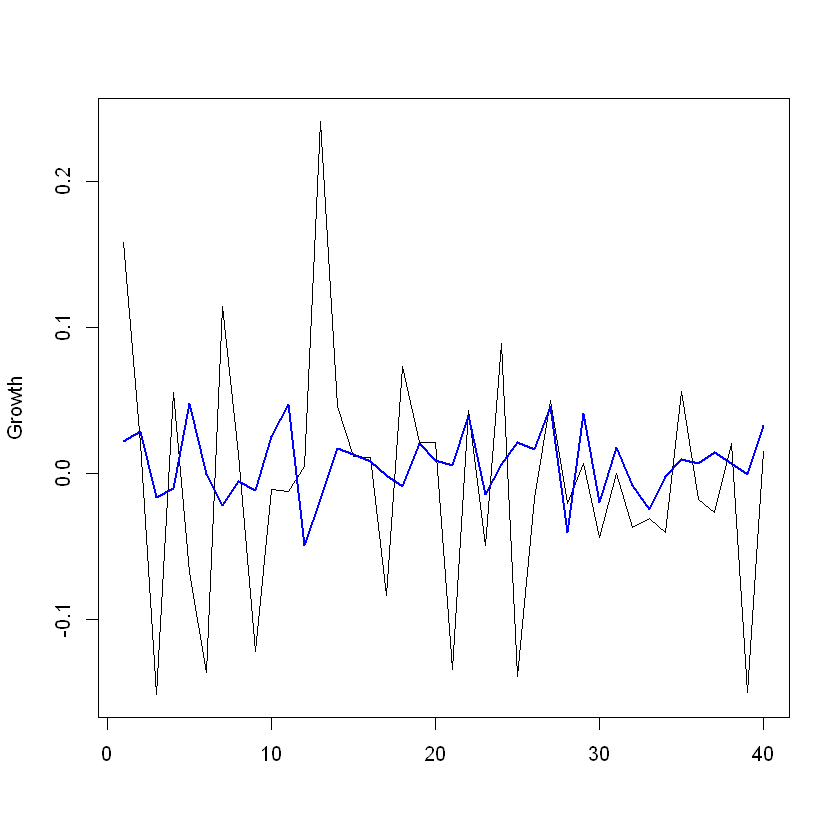

In [42]:
#Mean Prediction Comparison Plot
n=length(data)
ymin = min(c(as.vector(data.test),fore.series.1))
ymax = max(c(as.vector(data.test),fore.series.1))

plot(data.test,type="l", ylim=c(ymin,ymax), xlab=" ", 
ylab="Growth",main="")


lines(fore.series.1,lwd= 2, col="blue")




In [43]:
#Accuracy Measures
preds = as.vector(fore.series.1)
obs = as.vector(data.test)


#Mean Absolute Percentage Measure (MAPE)
100*mean(abs(preds-obs)/abs(obs))
#311.66

#Precision
sum((preds-obs)^2)/sum((obs-mean(obs))^2)
#1.14

[1] 300.537

[1] 1.067996